In [1]:
# Importing Libraries 
import pandas as pd
import ast
from datasets import load_dataset 
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset ( 'lukebarousse/data_jobs')
df = dataset ['train'].to_pandas ()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime (df ['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [13]:
df = df[df['job_title_short']=='Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

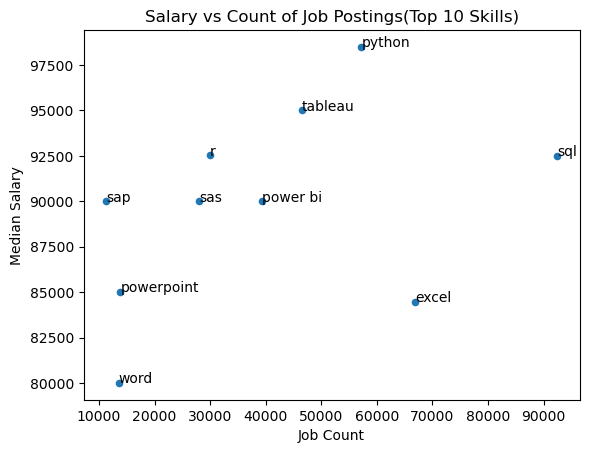

In [22]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Job Count')
plt.ylabel("Median Salary")
plt.title('Salary vs Count of Job Postings(Top 10 Skills)')
plt.tight_layout
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()